# Human Activity, PCA
---

- HumanActivity 읽어서 칼럼을 300개로 축소(PCA)
- RandomForest 모델로 분류
- 최종 결과
    - 테스트 데이터의 정확도
    - Confusion Matrix 출력


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

In [2]:
human = pd.read_csv('./HumanActivityRecognition/train.csv')
human.shape

(7352, 563)

In [99]:
testData = pd.read_csv('./HumanActivityRecognition/test.csv')

In [100]:
X_test = testData.drop(['Activity'], axis=1)
y_test = testData.iloc[:, -1]

In [51]:
X = human.iloc[:,:-1]
y = human.iloc[:,-1]

In [52]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [180]:
from sklearn.decomposition import PCA

pca = PCA(n_components=285)
X_train1 = pca.fit_transform(X)
X_test1 = pca.transform(X_test)

In [181]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=40, max_depth=3)
clf.fit(X_train1, y)
clf.score(X_train1, y)

0.8318824809575626

In [182]:
clf.score(X_test1, y_test)

0.8035290125551409

In [168]:
y_pred = clf.predict(X_test1)

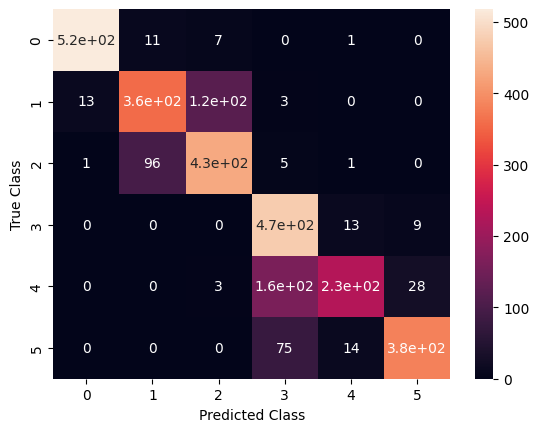

In [169]:
my.draw_cm(y_test, y_pred)